In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [2]:
df= pd.read_csv('titanic.csv')
df.head()

,sex,age,parch,fare,class,deck,embark_town,alive,alone
0,male,22.0,0,7.2500,Third,NaN,Southampton,no,False
1,female,38.0,0,71.2833,First,C,Cherbourg,yes,False
2,female,26.0,0,7.9250,Third,NaN,Southampton,yes,True
3,female,35.0,0,53.1000,First,C,Southampton,yes,False
4,male,35.0,0,8.0500,Third,NaN,Southampton,no,True


Misalkan, kalian sedang menganalisis data titanic, kalian ingin membandingkan umur (`age`) dari penumpang berdasarkan kota asal (`embark_town`) mereka.

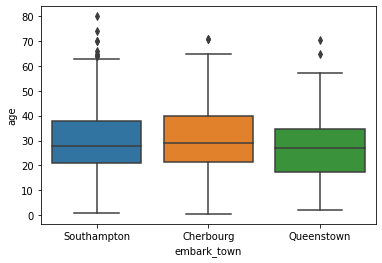

In [3]:
sns.boxplot(x='embark_town',y='age', data=df)

Karena variabel `age` adalah variabel numerik, maka untuk membandingkan `age` berdasarkan `embark_town`, kalian bisa membandingkan rata-rata atau median dari data kedua kelompok, menggunakan uji, seperti uji anova atau uji Kruskal Wallis, tergantung dari asumsi-asumsi yang berhasil dipenuhi dari data kalian.

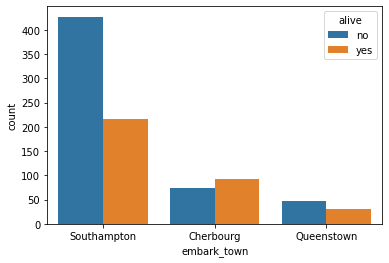

In [4]:
sns.countplot(hue='alive',x='embark_town',data=df)

Sekarang, bagaimana jika kita ingin menganalisa data jumlah penumpang yang selamat (`alive`)dari masing-masing kota (`embark_town`)? Baik `alive` maupun `embark_town` adalah variabel kategorikal dan tidak memiliki rata-rata maupun median. Ada beberapa uji yang bisa kita lakukan ke data kategorikal, salah satu yang paling popular adalah **uji chi-squared (χ²)**.

## Uji Chi Squared  
Uji Chi Squared, atau lebih spesifik, uji chi squared oleh Pearson, adalah uji hipotesis untuk mengevaluasi perbedaan antara nilai hasil observasi dengan nilai yang diekspektasi. Uji ini didasarkan pada [chi-squared distribution](https://en.wikipedia.org/wiki/Chi-squared_distribution), dengan hipotesis null, nilai frekuensi distribusi pada observasi sama dengan distribusi yang diekspek.  

Formula dari nilai statistik chi-square adalah sebagai berikut:

![gambar](https://www.statisticshowto.com/wp-content/uploads/2013/09/chi-square-formula.jpg)

Di mana:
* O adalah nilai observasi
* E adalah nilai ekspektasi
* C adalah nilai [*degree of freedom*](https://www.statisticshowto.com/probability-and-statistics/hypothesis-testing/degrees-of-freedom/)


Ada berbagai macam uji dan aplikasi dari uji chi squared. Dua aplikasi paling umum dari uji chi squared adalah [*goodness of fitness test*](https://www.jmp.com/en_ch/statistics-knowledge-portal/chi-square-test/chi-square-goodness-of-fit-test.html), dan [*Chi Square Test of Independence*](https://www.jmp.com/en_us/statistics-knowledge-portal/chi-square-test/chi-square-test-of-independence.html) atau *chi square contingency*.  

Pada artikel ini kita akan membahas *Chi Square Test of Independence*.

### _Chi Square Test of Independence_  

_Chi Square Test of Independence_ adalah uji hipotesis untuk menentukan apakah dua variabel kategorikal saling berhubungan atau tidak. Uji ini disebut juga sebagai *chi square contingency test* karena perhitungannya dilakukan pada [*contingency table*](https://www.statisticshowto.com/what-is-a-contingency-table/) atau yang kita kenal juga sebagai cross tabulasi.  

Misalkan, pada contoh di awal, kita memiliki data penumpang, selamat dan tidak, dari berbagai kota asal. 
Apabila kita membuat *contingency table* atau cross tabulasi dari data yang kita miliki, maka kita akan mendapatkan tabel seperti berikut.

In [22]:
df_ct=pd.crosstab(df['embark_town'],df['alive'])
df_ct 

alive,no,yes
embark_town,,
Cherbourg,75,93
Queenstown,47,30
Southampton,427,217


Dengan _Chi Square Test of Independence_ kita bisa menjawab pertanyaan, apakah kota asal penumpang memiliki hubungan dengan keselamatan mereka?

Hipotesis null dari uji kita adalah: kota asal penumpang tidak memiliki hubungan dengan keselamatan penumpang, dan hipotesis alternatif yang kita gunakan adalah: kota asal penumpang memiliki hubungan dengan keselamatan penumpang. Tabel cross tabulasi di atas, merupakan nilai observasi dari data kita.  

Sebelum kita bisa mulai menghitung nilai statistik chi square, kita perlu menghitung nilai _expected_ dari data kita. Untuk itu, kita perlu mencari total dari nilai observasi yang kita miliki, baik per baris maupun per kolom.

In [23]:
df_ct['total row']=df_ct.sum(axis=1)
df_ct

alive,no,yes,total row
embark_town,,,
Cherbourg,75,93,168
Queenstown,47,30,77
Southampton,427,217,644


In [24]:
df_ct.loc['total column']=df_ct.sum(axis=0)
df_ct

alive,no,yes,total row
embark_town,,,
Cherbourg,75,93,168
Queenstown,47,30,77
Southampton,427,217,644
total column,549,340,889


Untuk mencari *expected value*, kalikan nilai *total row* dengan *total column*, lalu dibagi dengan nilai total keseluruhan. Contoh, *expected value* untuk penumpang asal Cherbourg yang tidak selamat adalah:  
> `168*549/889= 103.748` 

Jika dibuat menjadi kode, akan menjadi sebagai berikut.

In [26]:
df_ct['total row'][0]*df_ct['no'][-1]/df_ct['total row'][-1]

103.74803149606299

Nah, sekarang kita hitung expected value untuk masing-masing kolom (`no` dan `yes`), lalu kita masukkan ke variabel df_exp. Setelahnya, kita bisa drop kolom *total row* dan baris *total column* karena sudah tidak kita gunakan lagi.

In [9]:
no=[]
for i in range(len(df_ct)):
    no.append(df_ct['total row'][i]*df_ct['no'][-1]/df_ct['total row'][-1])

In [10]:
yes=[]
for i in range(len(df_ct)):
    yes.append(df_ct['total row'][i][-1]*df_ct['yes'][-1]/df_ct['total row'])

In [11]:
df_exp=df_ct.copy()

In [12]:
df_exp['no']=no
df_exp['yes']=yes


#drop total karena sudah tidak diperlukan
df_exp=df_exp.drop('total row', axis=1)
df_exp= df_exp.drop('total column', axis=0)
df_exp


alive,no,yes
embark_town,,
Cherbourg,103.748031,64.251969
Queenstown,47.551181,29.448819
Southampton,397.700787,246.299213


In [13]:
#drop total karena sudah tidak diperlukan
df_ct=df_ct.drop('total row', axis=1)
df_ct= df_ct.drop('total column', axis=0)
df_ct

alive,no,yes
embark_town,,
Cherbourg,75,93
Queenstown,47,30
Southampton,427,217


Kita dapatkan dua tabel seperti di atas, yang masih-masing berisi *expected value* dan *observed value*. Setelah mendapatkan kedua nilai ini, kita bisa menghitung nilai statistic chi square dari data kita dengan rumus  

![gambar](https://www.statisticshowto.com/wp-content/uploads/2013/09/chi-square-formula.jpg)  

Jadi, kita bisa cari selisih dari masing-masing *expected value* dan *observed value*, lalu kita pangkat dua, bagi dengan *expected value* dan kita total hasilnya. 

In [14]:
#nilai chi square statistics
(((df_ct-df_exp)**2)/df_exp).sum().sum()

26.489149839237626

Nilai statistik yang kita dapatkan adalah 26.489. Sekarang, kita cari nilai tabel chi square kita, dengan _degree of freedom_:  
df= (jumlah baris-1)x(jumlah kolom-1)  
df=(3-1)x(2-1)=2  

![tabel](Chi-Square-table.jpg)

Nilai tabel yang kita dapatkan, dengan _alpha_ 0.05 dan df 2, adalah 5.991.
Karena nilai statistik, 26.489, lebih besar dari nilai tabel, 5.991, maka bisa kita **menolak ho**, sehingga bisa disimpulkan bahwa **kota asal penumpang memiliki hubungan dengan keselamatan penumpang**.

Sekarang, mari kita cocokkan hasil perhitungan kita di atas dengan _function_ di python.

In [15]:
stats, pval, dof, expected=chi2_contingency(df_ct)

print('nilai statistik=',stats,'\nnilai p-value=',pval)
#conclusion
if pval<=0.05:
    print('Tolak Ho')
else:
    print('Terima Ho')

nilai statistik= 26.48914983923762 
nilai p-value= 1.769922284120912e-06
Tolak Ho


Bisa dilihat, hasil perhitungan kita hampir sama persis dengan output dari _function_ di python, dan kesimpulan yang kita tarik pun sama, yaitu, **tolak ho**, kota asal penumpang memiliki hubungan dengan keselamatan penumpang.